## Project Name: Customer Personality Analysis

### Time Line of the project :
- Importing Libraries
- Data Analysis
- Data Cleaning and Feature Engineering
- Performing Clustering

Importing Libraries

In [2]:
import pandas as pd ## analysis
import numpy as np ## comptutational ability
import seaborn as sns 
import matplotlib.pyplot as plt  ## visualization
%matplotlib inline

In [3]:
df=pd.read_csv("marketing_campaign.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Data Analysis

In [8]:
## checking for null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
#### replace the null values of income column with mean
mean = df['Income'].mean()
df['Income']=df['Income'].fillna(mean)

In [10]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
### create an age column using Year of birth
df['Age'] = 2025 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,44


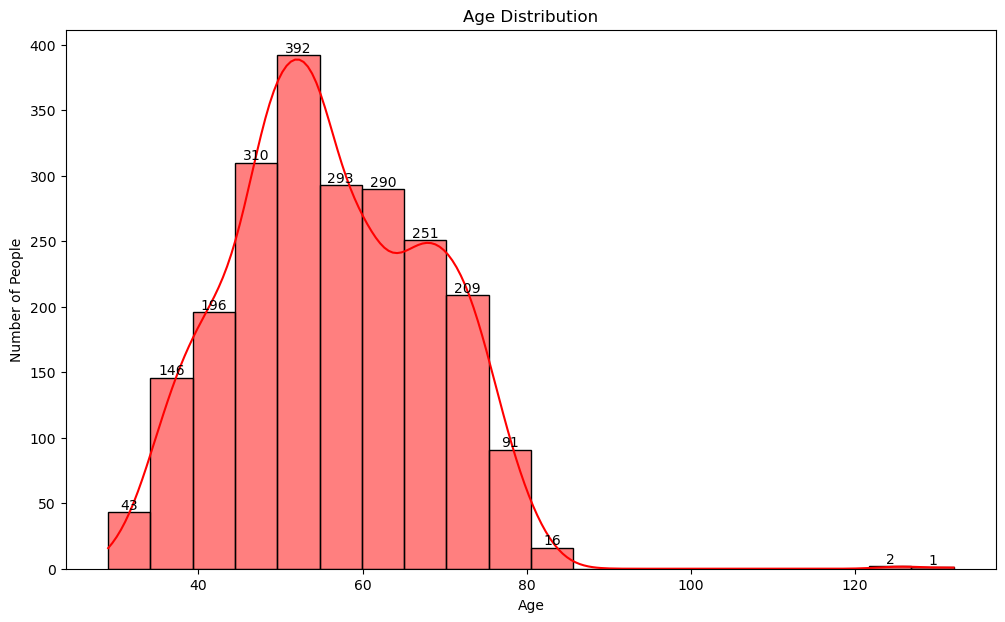

In [21]:
## creating the age distribution

plt.figure(figsize=(12,7))
ax=sns.histplot(df['Age'], bins=20, kde=True, color="red")  # KDE adds smooth density curve

# Add labels on bars
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only label visible bars
        plt.text(patch.get_x() + patch.get_width()/2, height, int(height),
                 ha='center', va='bottom', fontsize=10, color='black')

# Labels & Title
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Age Distribution")
plt.show()

In [26]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x27492a155b0>,
 [Text(-0.010799092464652335, 1.099946989450828, 'Graduation'),
  Text(-0.840441051704004, -0.7096892549635142, 'PhD'),
  Text(0.3574766803682644, -1.0402934311976049, 'Master'),
  Text(0.9970110351959686, -0.4647246450291434, '2n Cycle'),
  Text(1.09684684539309, -0.08322858734369598, 'Basic')],
 [Text(-0.005890414071628546, 0.5999710851549971, '50.3%'),
  Text(-0.45842239183854755, -0.38710322998009866, '21.7%'),
  Text(0.1949872802008715, -0.567432780653239, '16.5%'),
  Text(0.5438242010159828, -0.2534861700158964, '9.1%'),
  Text(0.59828009748714, -0.04539741127837962, '2.4%')])

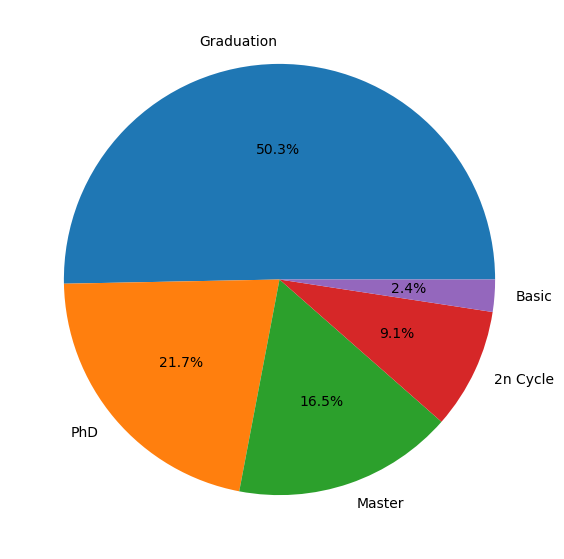

In [24]:
### view education distribution

plt.figure(figsize=(12,7))
edu_dist = df['Education'].value_counts()
plt.pie(edu_dist,autopct='%.1f%%', labels=[edu_dist.index[0],edu_dist.index[1], edu_dist.index[2], edu_dist.index[3], edu_dist.index[4]])

C:\Users\Alfred\AppData\Local\Temp\ipykernel_32324\3758421288.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ms.set_xticklabels(ms.get_xticklabels())


Text(0.5, 1.0, 'Count Plot for marital life of people')

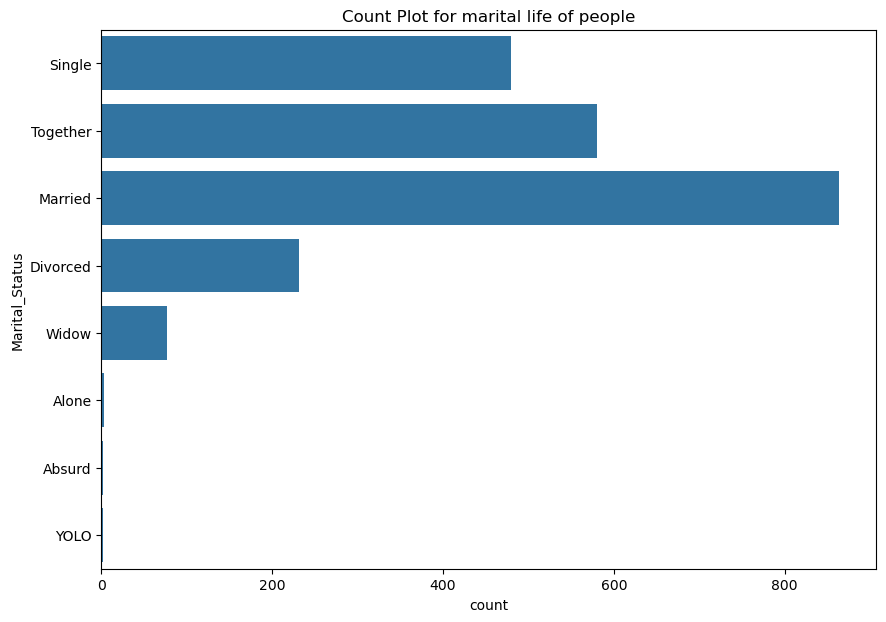

In [28]:
### distribution of marital status

plt.figure(figsize=(10,7))
ms =sns.countplot(df['Marital_Status'])
ms.set_xticklabels(ms.get_xticklabels())
plt.title("Count Plot for marital life of people")

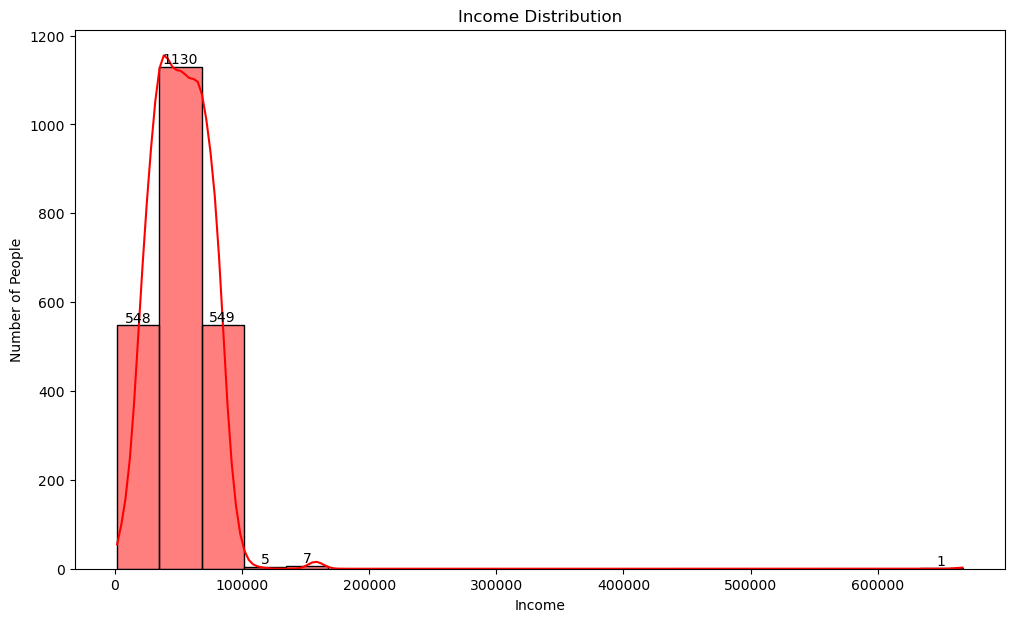

In [29]:
## creating the income distribution plot

plt.figure(figsize=(12,7))
ax=sns.histplot(df['Income'], bins=20, kde=True, color="red")  # KDE adds smooth density curve

# Add labels on bars
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only label visible bars
        plt.text(patch.get_x() + patch.get_width()/2, height, int(height),
                 ha='center', va='bottom', fontsize=10, color='black')

# Labels & Title
plt.xlabel("Income")
plt.ylabel("Number of People")
plt.title("Income Distribution")
plt.show()

Text(0.5, 1.0, 'Data for kids available at home')

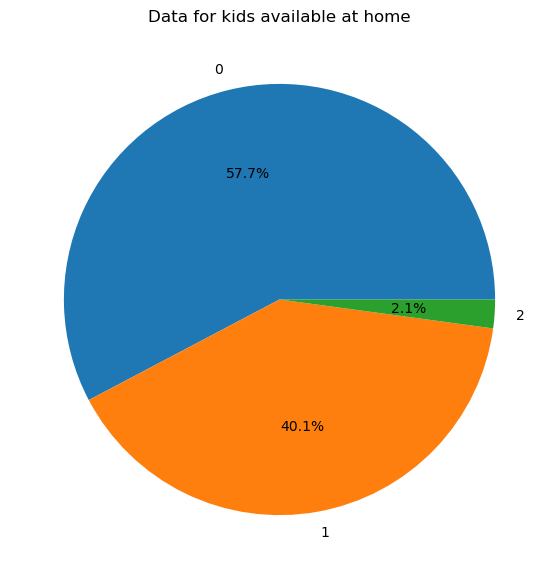

In [31]:
### kids at home
plt.figure(figsize=(10,7))
kid = df['Kidhome'].value_counts()
plt.pie(kid,autopct='%.1f%%',labels=[kid.index[0],kid.index[1],kid.index[2]])
plt.title("Data for kids available at home")

Text(0.5, 1.0, 'Data for Teens available at home')

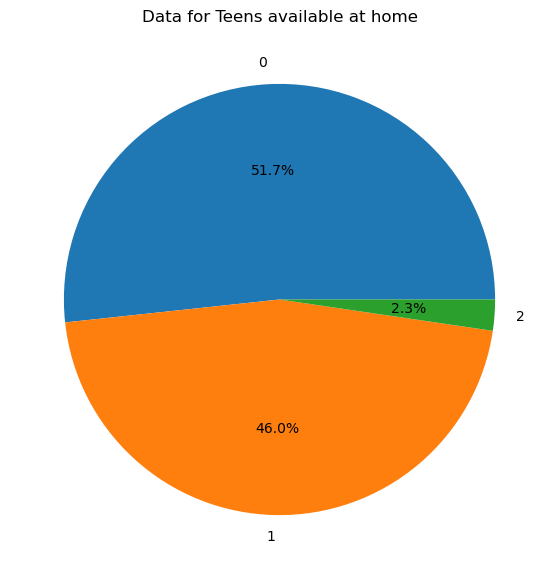

In [32]:
### teens  at home
plt.figure(figsize=(10,7))
kid = df['Teenhome'].value_counts()
plt.pie(kid,autopct='%.1f%%',labels=[kid.index[0],kid.index[1],kid.index[2]])
plt.title("Data for Teens available at home")

<Axes: >

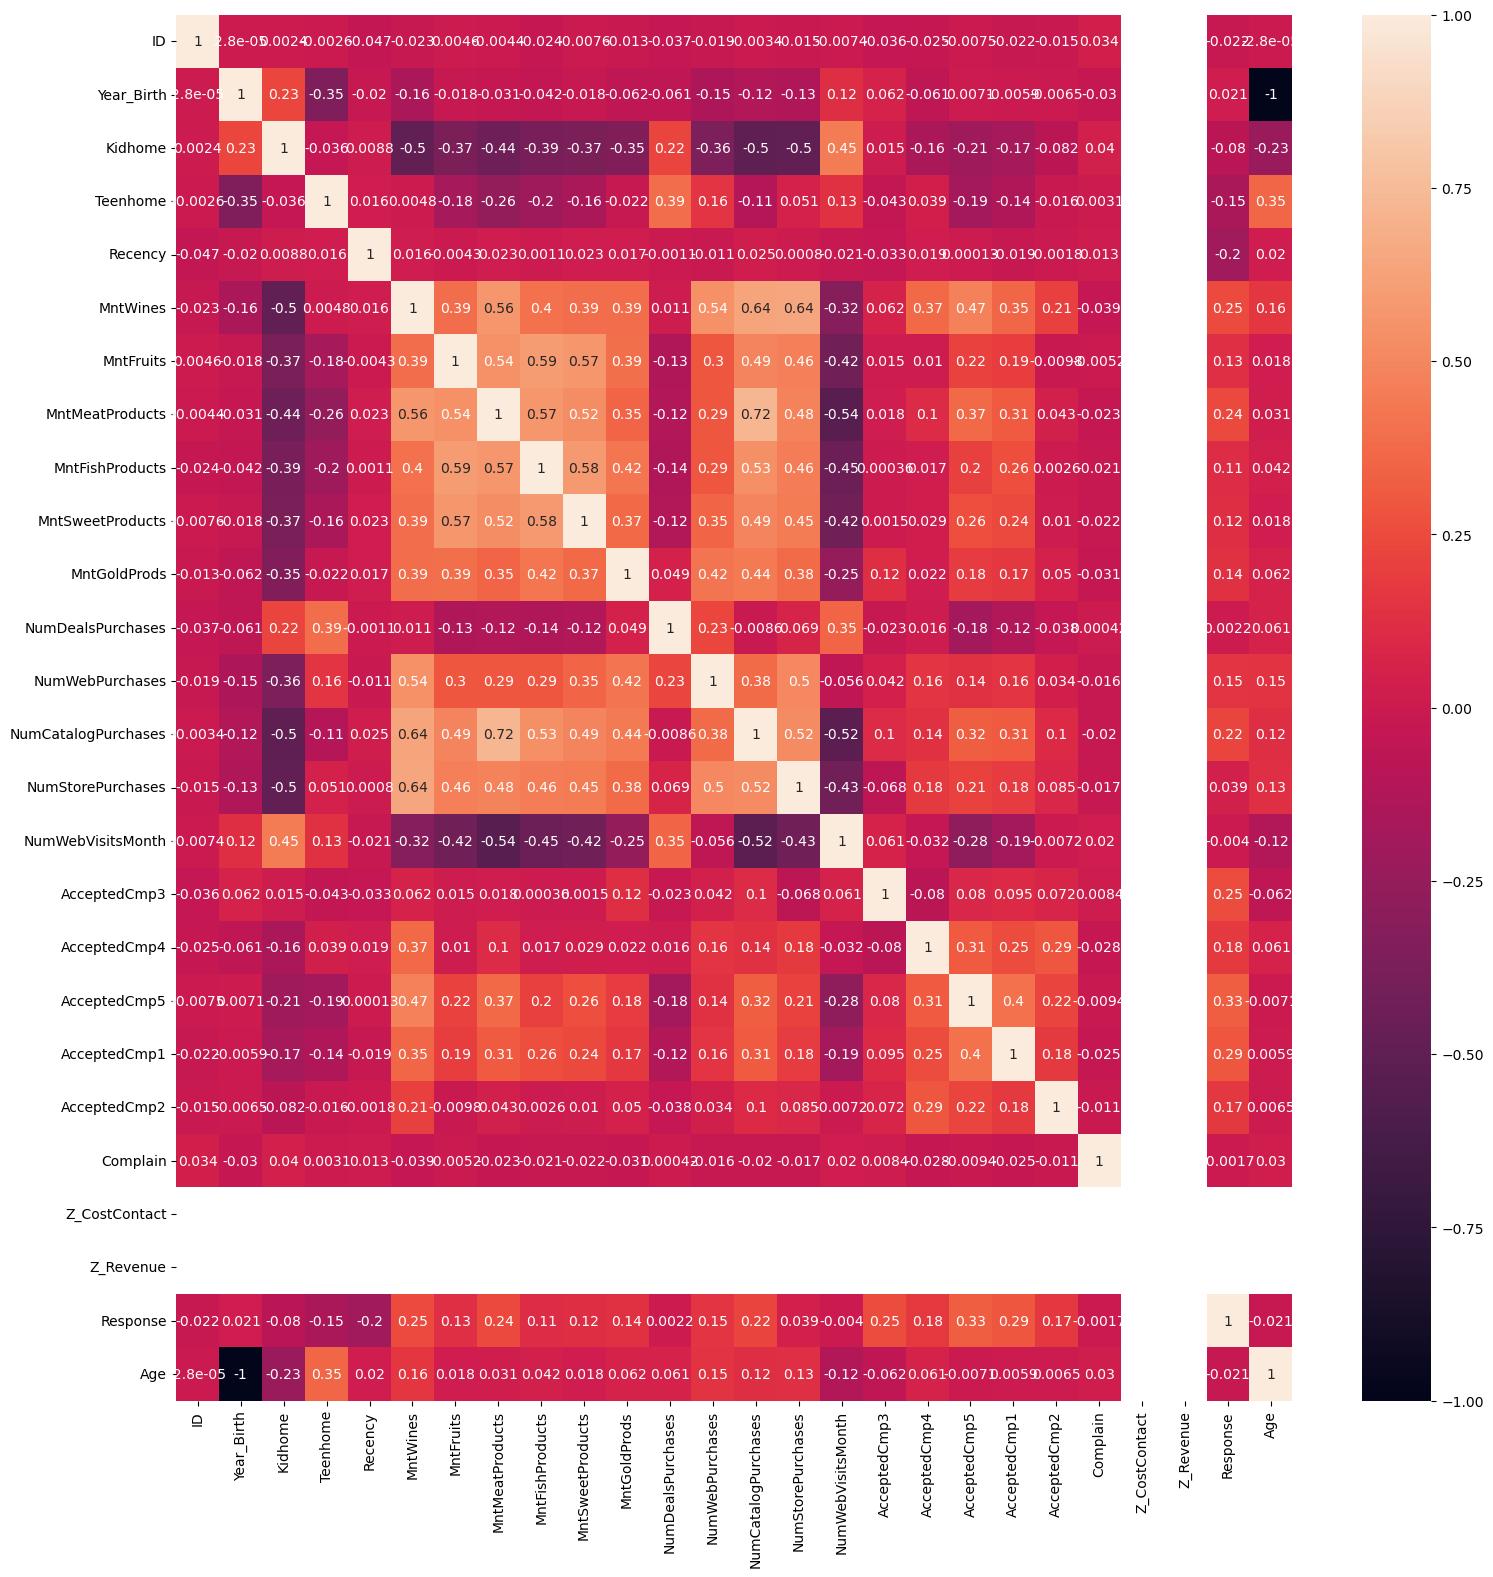

In [34]:
# Select only integer columns
int_cols = df.select_dtypes(include=['int64', 'int32']).columns
df_int = df[int_cols]

# Compute correlation matrix
corr_matrix = df_int.corr()

plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix,annot=True)

<Axes: xlabel='Income', ylabel='MntFishProducts'>

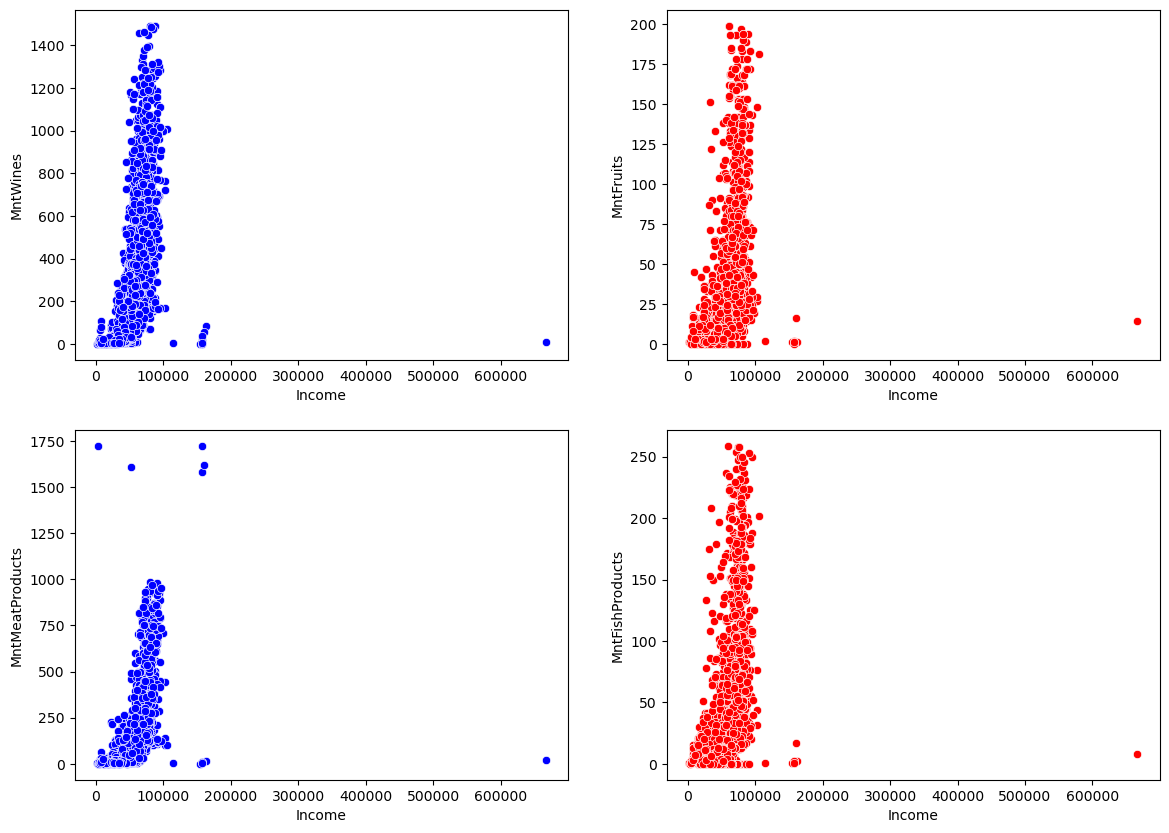

In [35]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.scatterplot(data=df,x='Income',y='MntWines',color='blue')
plt.subplot(2,2,2)
sns.scatterplot(data=df,x='Income',y='MntFruits',color='red')
plt.subplot(2,2,3)
sns.scatterplot(data=df,x='Income',y='MntMeatProducts',color='blue')
plt.subplot(2,2,4)
sns.scatterplot(data=df,x='Income',y='MntFishProducts',color='red')

<BarContainer object of 5 artists>

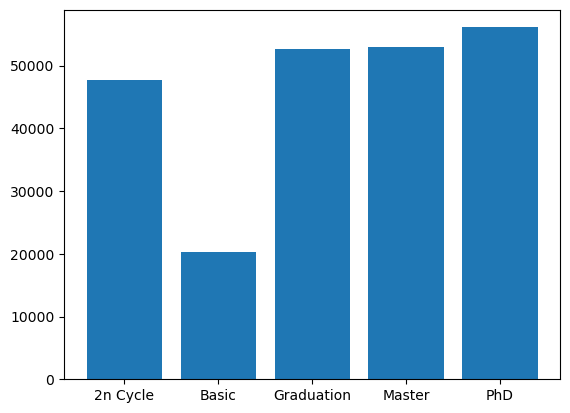

In [37]:
## income by education

education_income= df.groupby('Education')['Income'].mean()

plt.bar(education_income.index,height=round(education_income,2))

## Data Cleaning and Feature Engineering

Creating extra features like total money spent, family size

In [38]:
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [40]:
df["Relation"] = df["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1})
df["Children"] = df["Kidhome"]+ df["Teenhome"]
df["Family_Size"] = df["Relation"]+ df["Children"]
df.head()

C:\Users\Alfred\AppData\Local\Temp\ipykernel_32324\2711123021.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Relation"] = df["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1})


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spent,Relation,Children,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,68,1617,1,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,71,27,1,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,60,776,2,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,41,53,2,1,3
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,44,422,2,1,3


In [41]:
df= df.drop(['Relation','Children'],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spent,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,68,1617,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,71,27,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,60,776,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,41,53,3
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,44,422,3


In [42]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Spent', 'Family_Size'],
      dtype='object')

#### Label Encoding categorical data i.e. Education data

In [43]:
from sklearn.preprocessing import LabelEncoder ## one hot encoding
from sklearn.preprocessing import StandardScaler  ## scale the values based on mean of the data

In [45]:
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

In [46]:
lb = LabelEncoder()
df['Education']= lb.fit_transform(df['Education'])
df['Education']

0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Name: Education, Length: 2240, dtype: int32

In [49]:
##### make of copy of data and drop the irrelevant tables
df1 = df.copy()
to_drop = ["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1","AcceptedCmp2", "Complain", "Response",'Marital_Status','Dt_Customer' ]
df1 = df1.drop(to_drop, axis=1)


In [50]:
df1.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Total_Spent,Family_Size
0,5524,1957,2,58138.0,0,0,58,635,88,546,...,3,8,10,4,7,3,11,68,1617,1
1,2174,1954,2,46344.0,1,1,38,11,1,6,...,2,1,1,2,5,3,11,71,27,3
2,4141,1965,2,71613.0,0,0,26,426,49,127,...,1,8,2,10,4,3,11,60,776,2
3,6182,1984,2,26646.0,1,0,26,11,4,20,...,2,2,0,4,6,3,11,41,53,3
4,5324,1981,4,58293.0,1,0,94,173,43,118,...,5,5,3,6,5,3,11,44,422,3


In [51]:
scaler = StandardScaler()
#scaled_feature = scaler.fit_transform(df.values)
#scaled_df = pd.DataFrame(scaled_feature, index=df.index, columns=df.columns)

## Aproach 1: Unsupervised Learning

### Perform Clustering

#### We will use the Elbob method to find the optimum number of clusters

In [53]:
!pip install yellowbrick

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   -- ------------------------------------ 20.5/282.6 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/282.6 kB 326.8 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 328.2 kB/s eta 0:00:01
   ----------- --------------------------- 81.9/282.6 kB 416.7 kB/s eta 0:00:01
   ----------------- -------------------- 133.1/282.6 kB 491.5 kB/s eta 0:00:01
   ---------------------------- --------- 215.0/282.6 kB 689.6 kB/s eta 0:00:01
   ------------------------------- ------ 235.5/282.6 kB 686.8 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 726.3 kB/s eta 0:00:00


In [54]:
df= df.drop(['Marital_Status','Dt_Customer'],axis=1)
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spent,Family_Size
0,5524,1957,2,58138.0,0,0,58,635,88,546,...,0,0,0,0,3,11,1,68,1617,1
1,2174,1954,2,46344.0,1,1,38,11,1,6,...,0,0,0,0,3,11,0,71,27,3
2,4141,1965,2,71613.0,0,0,26,426,49,127,...,0,0,0,0,3,11,0,60,776,2
3,6182,1984,2,26646.0,1,0,26,11,4,20,...,0,0,0,0,3,11,0,41,53,3
4,5324,1981,4,58293.0,1,0,94,173,43,118,...,0,0,0,0,3,11,0,44,422,3


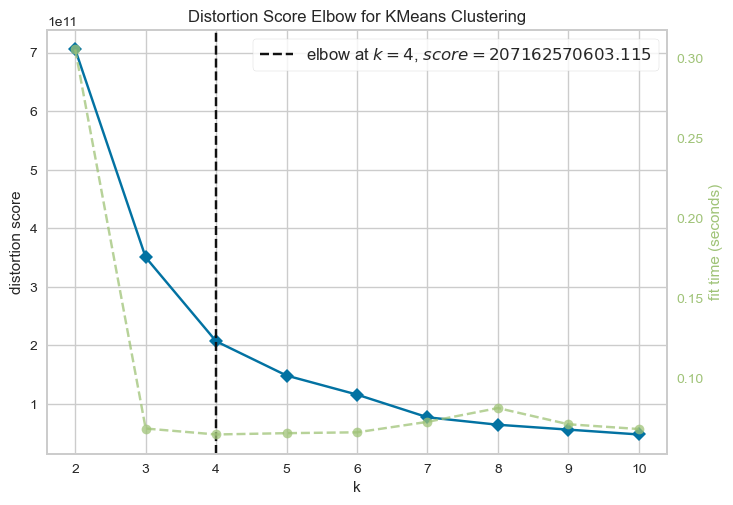

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
em = KElbowVisualizer(KMeans(), k=10)
em.fit(df)
em.show()

---- We see that the optimum number of clusters that should be used is k=4

-----We will use K Means Clutering for the operation

In [56]:
from sklearn.cluster import KMeans

In [57]:
kmc = KMeans(n_clusters=4)
# fit model and predict clusters
pred = kmc.fit_predict(df)
df["Clusters"] = pred

In [58]:
df['Clusters']

0       2
1       2
2       0
3       1
4       2
       ..
2235    2
2236    2
2237    2
2238    0
2239    2
Name: Clusters, Length: 2240, dtype: int32

C:\Users\Alfred\AppData\Local\Temp\ipykernel_32324\3159537817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(x=df["Clusters"], palette="rainbow")


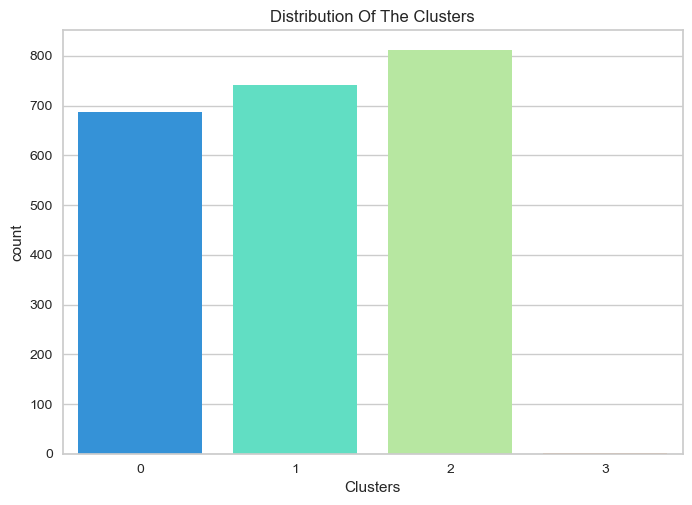

In [59]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
fig = sns.countplot(x=df["Clusters"], palette="rainbow")
fig.set_title("Distribution Of The Clusters")
plt.show()

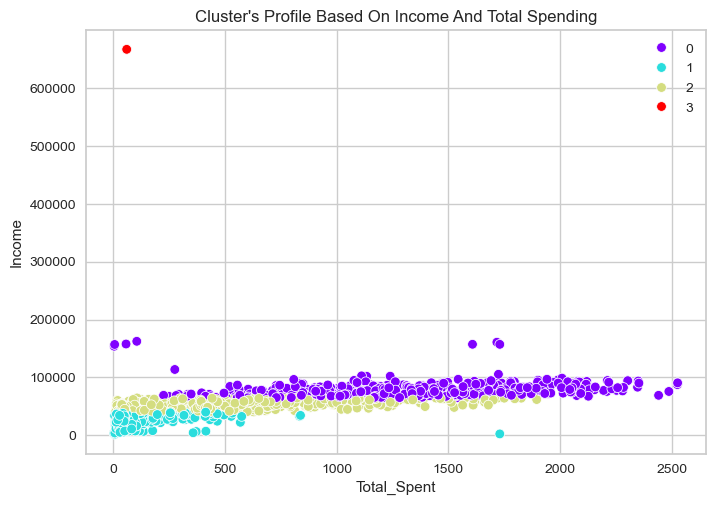

In [60]:
fig = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["Clusters"], palette="rainbow")
fig.set_title("Cluster's Profile Based On Income And Total Spending")
plt.legend()
plt.show()

## Approach 2 : Supervised Learning

In [61]:
y=df['Response'] ## dependent var
X_new=df.drop(['Response','Education'],axis=1) ## independent var

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1792, 29)
Shape of y_train =  (1792,)
Shape of X_test =  (448, 29)
Shape of y_test =  (448,)


### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
classifier.score(X_test, y_test)

0.828125

### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8504464285714286

### RANDOM FOREST

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
rf.score(X_test,y_test)

0.8928571428571429